## Columbia ADS April 2019

### Webinar - Pandas (and Numpy)

Course Leader: Robert Manriquez

Emeritus Institute of Management

### Intro: The Titanic Dataset

![img](ship.png)

* RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in 1912 after the ship struck an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making it one of modern history's deadliest peacetime commercial marine disasters. (from Wikipedia)


* The most famous intro data set for learning data science is _The Titanic Dataset_ available from Kaggle: https://www.kaggle.com/c/titanic/overview


* Why aren't we going over NumPy?
    - In practice... you may not be using NumPy for more than what's in Assignment 8
    - Pandas can already do most aggregations and calculations for EDA (Exploratory Data Analysis).
    - NumPy _is_ very useful for manipulating arrays and matrices, Pandas is better for tables and DataFrames.

#### Learning Objectives:

- <b>Download a dataset, read it in with Pandas</b>
- <b>Use the data dictionary to understand the data contents</b>
    - What are the columns, and what do their values mean?
- <b>Basic data cleaning and characterization</b>
    - What data types are in each column?
    - How can we describe the data?
    - Convert non-numeric data types
    - drop/impute null values
- <b>Visualizations and Calculations</b>
    - Histograms
    - Bar Graphs
    - Pair Plots (Seaborn)
    - Mean, Median, Mode, Standard Dev.
    - Correlations with Survival Rate.
    
#### Goal of this dataset:

- Which passengers were most likely to survive / not survive?
- Which variables influenced survival rate the most?
    - (i.e., what were the top indicators that a passenger was likely to survive?)
- Extra: How could we set this up for a classification machine learning problem?

In [1]:
import pandas as pd, numpy as np, seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.rc('xtick', labelsize=15)     
plt.rc('ytick', labelsize=15)
plt.rc('axes', titlesize=16)

sns.set_style('darkgrid')

#### Read in with Pandas

In [2]:
df = pd.read_csv('./data/train.csv') # Downloaded from https://www.kaggle.com/c/titanic/overview

# Note that "train" only has 891 data points, the "test" set has 418

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Data Dictionary

<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

#### Variable Notes

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...

- Sibling = brother, sister, stepbrother, stepsister

- Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...

- Parent = mother, father

- Child = daughter, son, stepdaughter, stepson

- Some children travelled only with a nanny, therefore parch=0 for them.

### Basic Data Cleaning

In [4]:
df.shape

(891, 12)

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

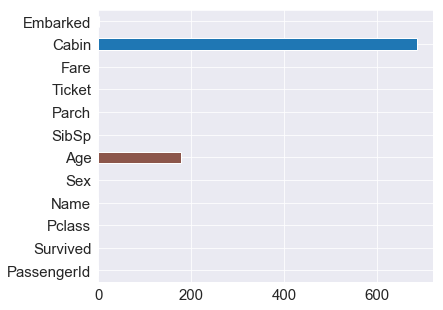

In [8]:
df.isnull().sum().plot(kind = 'barh', figsize = (6,5))

In [9]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

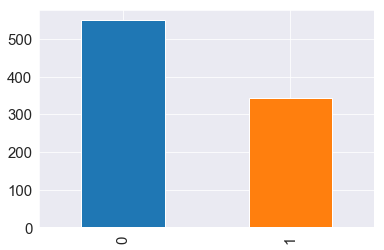

In [10]:
df.Survived.value_counts().plot(kind= 'bar')

In [11]:
df.loc[df.Cabin.isnull(),:].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [12]:
df.loc[df.Cabin.notnull(),:].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [13]:
df.Cabin.fillna("Not Listed", inplace = True)

In [14]:
df.loc[df.Cabin == 'Not Listed', :].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Not Listed,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Not Listed,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Not Listed,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Not Listed,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,Not Listed,S


In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [16]:
## Now let's drop null rows
df.dropna(inplace = True)

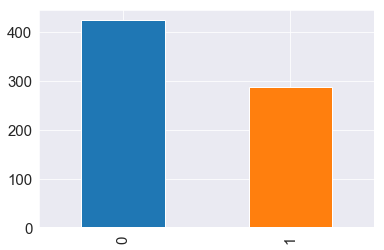

In [17]:
df.Survived.value_counts().plot(kind= 'bar')

In [18]:
num_survived = df.loc[df.Survived == 1, 'Survived'].count()

In [19]:
total_passengers = df.Survived.count()

In [20]:
print("Total Passengers (with clean data) : " + str(total_passengers))
print("Total Survivors (with clean data)  : " + str(num_survived))

print("Total Survival Rate                : {}%".format(100*round(num_survived / total_passengers, 2)))

Total Passengers (with clean data) : 712
Total Survivors (with clean data)  : 288
Total Survival Rate                : 40.0%


In [21]:
df.loc[df.Survived == 1, 'Survived'].count()

288

In [22]:
df.shape
## Lost some data, but still plenty to do analysis

(712, 12)

In [23]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

* Now that we have a "clean" data set, let's do two things:

    1) Explore and understand each column
    
    2) Convert non-numeric types in to useful types (if possible)
    
    3) Create visuals to tell a story
    
    4) Compare variables with "Survival" and calculate survival rates
    

### Exploratory Data Analysis

* Note:  Since 'Ticket' and 'Cabin' are unique identifiers, we can go ahead and drop them for our analysis.

In [24]:
df.drop(['Ticket', 'Cabin', 'Name'], axis = 1, inplace = True)

In [25]:
# Pclass
df.Pclass.value_counts()

3    355
1    184
2    173
Name: Pclass, dtype: int64

In [26]:
#Alternatively with a groupby
df.groupby("Pclass").count()['PassengerId']

Pclass
1    184
2    173
3    355
Name: PassengerId, dtype: int64

In [27]:
# Using .agg
df.groupby("Pclass").agg( {"Pclass" : 'count'})

,Pclass
Pclass,
1,184
2,173
3,355


In [28]:
# Using .agg (can display multiple column with different functions)
df.groupby("Pclass").agg( {"Pclass" : 'count', "Survived" : 'sum'}) 

,Pclass,Survived
Pclass,,
1,184,120
2,173,83
3,355,85


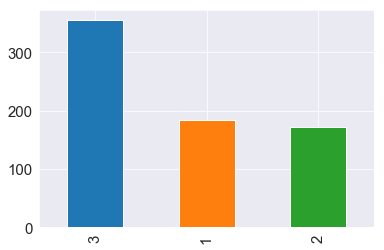

In [29]:
df.Pclass.value_counts().plot(kind = 'bar')

In [30]:
df.groupby("Pclass").mean()['Survived']

Pclass
1    0.652174
2    0.479769
3    0.239437
Name: Survived, dtype: float64

In [31]:
df.groupby("Pclass").agg( 
    {"Pclass" : 'count',
     "Survived" : ['sum', 'mean']}) 

Pclass Survived          
        count      sum      mean
Pclass                          
1         184      120  0.652174
2         173       83  0.479769
3         355       85  0.239437

In [32]:
df.Pclass = df.Pclass.astype(str)

pclass_vs_surv = pd.get_dummies(df[['Pclass', 'Survived']])

In [33]:
pclass_vs_surv.head()

,Survived,Pclass_1,Pclass_2,Pclass_3
0,0,0,0,1
1,1,1,0,0
2,1,0,0,1
3,1,1,0,0
4,0,0,0,1


In [34]:
pclass_vs_surv.corr()['Survived']

Survived    1.000000
Pclass_1    0.297908
Pclass_2    0.086891
Pclass_3   -0.335364
Name: Survived, dtype: float64

In [35]:
## Embarked
df.Embarked.value_counts()

S    554
C    130
Q     28
Name: Embarked, dtype: int64

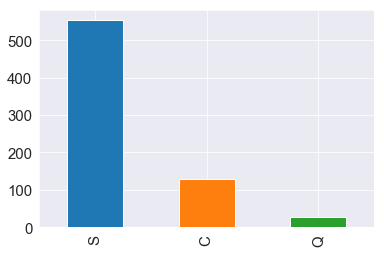

In [36]:
df.Embarked.value_counts().plot(kind = 'bar')

In [37]:
df.groupby('Embarked').mean()['Survived']

Embarked
C    0.607692
Q    0.285714
S    0.362816
Name: Survived, dtype: float64

In [38]:
df.groupby("Pclass").agg( 
    {"Pclass" : 'count',
     "Survived" : ['sum', 'mean']}) 

Pclass Survived          
        count      sum      mean
Pclass                          
1         184      120  0.652174
2         173       83  0.479769
3         355       85  0.239437

In [39]:
def convert_embarked(x):
    if x == "C":
        return "Cherbourg"
    elif x == 'Q':
        return "Queenstown"
    elif x == 'S':
        return "Southampton"

df.Embarked = df.Embarked.map(convert_embarked)

In [40]:
df.groupby("Embarked").agg( 
    {"Embarked" : 'count',
     "Survived" : ['sum', 'mean']}) 

Embarked Survived          
               count      sum      mean
Embarked                               
Cherbourg        130       79  0.607692
Queenstown        28        8  0.285714
Southampton      554      201  0.362816

In [41]:
embarked_vs_Survived = pd.get_dummies(df[['Embarked', 'Survived']])

In [42]:
embarked_vs_Survived.head()

,Survived,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton
0,0,0,0,1
1,1,1,0,0
2,1,0,0,1
3,1,0,0,1
4,0,0,0,1


In [43]:
embarked_vs_Survived.corr()['Survived']

Survived                1.000000
Embarked_Cherbourg      0.195673
Embarked_Queenstown    -0.048966
Embarked_Southampton   -0.159015
Name: Survived, dtype: float64

In [44]:
### Can we do this more quickly?  With the other variables?

In [45]:
df_w_dummies = pd.get_dummies(df)

In [46]:
df_w_dummies.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton
0,1,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [47]:
df_w_dummies.corr()['Survived']

PassengerId             0.029526
Survived                1.000000
Age                    -0.082446
SibSp                  -0.015523
Parch                   0.095265
Fare                    0.266100
Pclass_1                0.297908
Pclass_2                0.086891
Pclass_3               -0.335364
Sex_female              0.536762
Sex_male               -0.536762
Embarked_Cherbourg      0.195673
Embarked_Queenstown    -0.048966
Embarked_Southampton   -0.159015
Name: Survived, dtype: float64

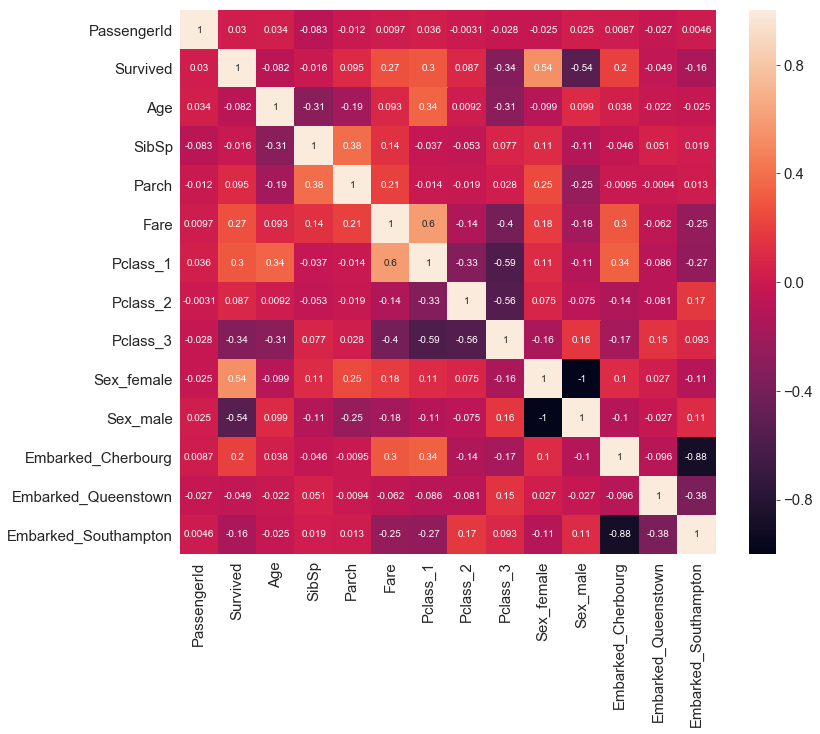

In [48]:
plt.figure(figsize = (12,10))
sns.heatmap(df_w_dummies.corr(), annot=True)

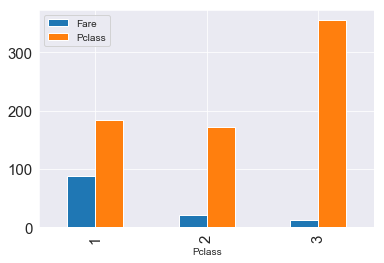

In [49]:
df.groupby('Pclass').agg({"Fare" : 'mean', "Pclass" : 'count'}).plot(kind='bar')

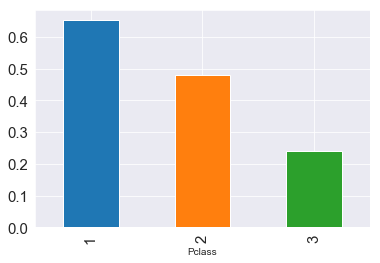

In [50]:
df.groupby('Pclass').mean()['Survived'].plot(kind= 'bar')

In [51]:
df_w_dummies.corr()['Fare'].sort_values()

Pclass_3               -0.402219
Embarked_Southampton   -0.250994
Sex_male               -0.182457
Pclass_2               -0.140246
Embarked_Queenstown    -0.062346
PassengerId             0.009655
Age                     0.093143
SibSp                   0.139860
Sex_female              0.182457
Parch                   0.206624
Survived                0.266100
Embarked_Cherbourg      0.301337
Pclass_1                0.596792
Fare                    1.000000
Name: Fare, dtype: float64

### What did we do thus far?
* Performed aggregations with groupby, visualized trends of survival rates versus categorical variables
* Converted categorical variables into vectorized "dummy" variables.
* Calculated and plotted correlations of numerical and "dummy" categorical variables against "Survived"

In [52]:
## Saving our dataframe in case we want to revisit in another notebook.
df_w_dummies.to_csv('./data/df_with_dummies.csv')

### Creating columns and features

In [53]:
## Starting over, reading in the "train" data set again
df = pd.read_csv('./data/train.csv') 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### What can we do with the "less interpretable" columns?
- We can pull out data from the 'Names' column.
    - Perhaps 'fancy' titles had better survival rates?
- We can combine 'SibSp' and 'Parch' and call it "FamilyCount" to represent how many family members a passenger had on board.
    - Is it possible that having a family onboard increased survival rates?

In [54]:
df['Name'][0:5]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [55]:
df['Name'].map(lambda x : x.split(','))[0:5]

0                           [Braund,  Mr. Owen Harris]
1    [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                            [Heikkinen,  Miss. Laina]
3      [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                          [Allen,  Mr. William Henry]
Name: Name, dtype: object

In [56]:
df['Name'].map(lambda x : x.split(',')[1])[0:5]

0                                Mr. Owen Harris
1     Mrs. John Bradley (Florence Briggs Thayer)
2                                    Miss. Laina
3             Mrs. Jacques Heath (Lily May Peel)
4                              Mr. William Henry
Name: Name, dtype: object

In [57]:
df['Name'].map(lambda x : x.split(',')[1].split('.'))[0:5]

0                               [ Mr,  Owen Harris]
1    [ Mrs,  John Bradley (Florence Briggs Thayer)]
2                                   [ Miss,  Laina]
3            [ Mrs,  Jacques Heath (Lily May Peel)]
4                             [ Mr,  William Henry]
Name: Name, dtype: object

In [58]:
# Creating the "Title" column, since we know how to select it step-by-step
df['Title'] = df['Name'].map(lambda x : x.split(',')[1].split('.')[0])

In [59]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [60]:
df.groupby("Title").agg({"Title" : 'count', "Survived" : 'mean'}).sort_values(by = 'Survived')

,Title,Survived
Title,,
Capt,1,0.000000
Don,1,0.000000
Jonkheer,1,0.000000
Rev,6,0.000000
Mr,517,0.156673
Dr,7,0.428571
Col,2,0.500000
Major,2,0.500000
Master,40,0.575000


In [61]:
## Making Family Count

df['FamilyCount'] = df['SibSp'] + df['Parch']

In [62]:
df.groupby('FamilyCount').agg({"FamilyCount" : 'count', "Survived" : 'mean'}).sort_index()

,FamilyCount,Survived
FamilyCount,,
0,537,0.303538
1,161,0.552795
2,102,0.578431
3,29,0.724138
4,15,0.200000
5,22,0.136364
6,12,0.333333
7,6,0.000000
10,7,0.000000


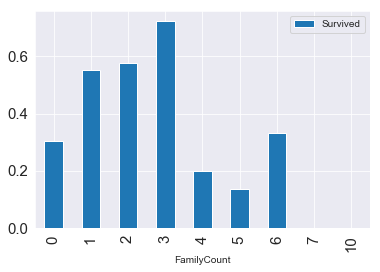

In [63]:
df.groupby('FamilyCount').agg({"Survived" : 'mean'}).plot(kind = 'bar')

### Lastly, let's focus on the remaining numerical columns 'Age' and 'Fare'

In [64]:
df = df.drop(['PassengerId','Name', 'Cabin', 'Ticket','SibSp', 'Parch','Title'], axis = 1).dropna()

In [65]:
df['Pclass'] = df['Pclass'].astype(str)
df['Embarked'] = df['Embarked'].map(convert_embarked)

In [66]:
df = pd.get_dummies(df)

In [67]:
df.head()

,Survived,Age,Fare,FamilyCount,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton
0,0,22.0,7.2500,1,0,0,1,0,1,0,0,1
1,1,38.0,71.2833,1,1,0,0,1,0,1,0,0
2,1,26.0,7.9250,0,0,0,1,1,0,0,0,1
3,1,35.0,53.1000,1,1,0,0,1,0,0,0,1
4,0,35.0,8.0500,0,0,0,1,0,1,0,0,1


In [ ]:
sns.pairplot(df.dropna())

In [ ]:
plt.figure(figsize = (12,10))
sns.heatmap(df_w_dummies.corr(), annot=True)

In [ ]:
df['Age'].dropna().hist(bins = 20)

In [ ]:
df.loc[df.Survived == 0, 'Age'].dropna().hist(bins = 20)

In [ ]:
df.hist(column = 'Age', bins = 20, by = 'Survived', sharex=True, sharey=True,)

In [ ]:
plt.figure()
plt.title("Ages of Survivors / Non-Survivors", size = 14)
df.loc[df.Survived == 0, 'Age'].dropna().hist(bins = 20, alpha = 0.8)
df.loc[df.Survived == 1, 'Age'].dropna().hist(bins = 20, alpha = 0.8)
plt.legend(['Non-Survivor','Survivor'])
plt.show()

In [ ]:
df.hist(column = 'Fare', bins = 20, by = 'Survived', sharex=True, sharey=True,)

In [ ]:
plt.figure()
plt.title("Fare Paid by Survivors / Non-Survivors", size = 14)
df.loc[df.Survived == 1, 'Fare'].dropna().hist(bins = 30, alpha = 0.7)
df.loc[df.Survived == 0, 'Fare'].dropna().hist(bins = 30, alpha = 0.7)
plt.legend(['Survivor', 'Non-Survivor'])
plt.show()

In [ ]:
## Let's save this for future reference
df.to_csv("./data/train_df_final.csv")

In [ ]:
## Survival Rates for Fare, Age bins
## Creating a new dataframe for analysis

df_w_bins = df.copy()

df_w_bins['Age_bins'] = pd.cut(df['Age'], bins = 8)

In [ ]:
df_w_bins.groupby('Age_bins').agg( {'Survived' : ['count', 'mean']} )

In [ ]:
df_w_bins.groupby('Age_bins').agg( {'Survived' : 'mean'} ).plot(kind = 'barh', title = 'Survival Rate by Age')

In [ ]:
df_w_bins['Fare_bins'] = pd.cut(df['Fare'].round(), bins = 8)
df_w_bins.groupby('Fare_bins').agg({'Survived' : ['count', 'mean']})

In [ ]:
farebins_grouped = df_w_bins.groupby('Fare_bins').agg({'Survived' : 'mean'})
farebins_grouped.plot(kind = 'barh', title = 'Survival Rate by Fares Paid')

In [ ]:
# Alternatively, try evenly-populated bins used 'pd.qcut'
#Example:
#pd.qcut(df.Age, q = 5)

In [ ]:
df_w_bins['Age_bins'] = pd.qcut(df['Age'], q = 8)

In [ ]:
df_w_bins.groupby('Age_bins').agg( {'Survived' : ['count', 'mean']} )